In [37]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

print(X)
print(y)

[[-2.19655439 -6.04817613]
 [ 0.81789766  4.8792503 ]
 [ 2.8314302   5.80299161]
 ...
 [-3.26670243 -2.62516778]
 [ 2.23050411  4.08324346]
 [ 0.81695873  4.89150137]]
[0 1 1 ... 0 1 1]


Iteration 1, Loss: 0.6856
Iteration 2, Loss: 0.3526
Iteration 3, Loss: 0.2432
Iteration 4, Loss: 0.1891
Iteration 5, Loss: 0.1562
Iteration 6, Loss: 0.1339
Iteration 7, Loss: 0.1177
Iteration 8, Loss: 0.1052
Iteration 9, Loss: 0.0954
Iteration 10, Loss: 0.0874
Iteration 11, Loss: 0.0807
Iteration 12, Loss: 0.0750
Iteration 13, Loss: 0.0702
Iteration 14, Loss: 0.0660
Iteration 15, Loss: 0.0623
Iteration 16, Loss: 0.0590
Iteration 17, Loss: 0.0561
Iteration 18, Loss: 0.0535
Iteration 19, Loss: 0.0511
Iteration 20, Loss: 0.0490


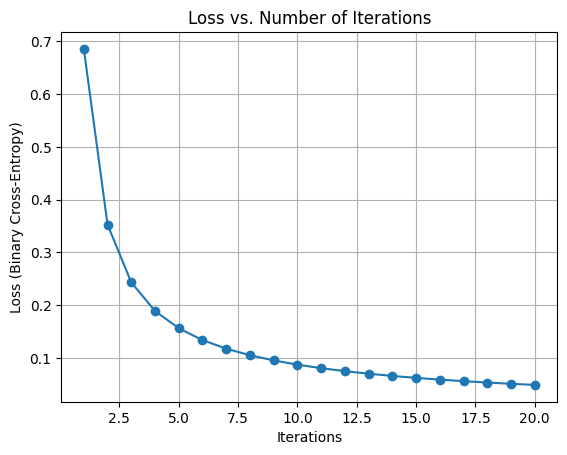

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for the bias term

# Initialize weights
np.random.seed(1)
weights = np.random.rand(X.shape[1]) * 0.01  # Small random weights

# Hyperparameters
learning_rate = 0.1
iterations = 20

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Store loss values
loss_values = []

# Batch Gradient Descent
for i in range(iterations):
    # Calculate predictions
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    
    # Compute the gradient
    error = predictions - y
    gradient = np.dot(X.T, error) / y.size  # Average gradient
    
    # Update weights
    weights -= learning_rate * gradient
    
    # Calculate and store the loss (Binary Cross-Entropy Loss)
    loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    loss_values.append(loss)
    print(f'Iteration {i + 1}, Loss: {loss:.4f}')

# Plot the loss with respect to the number of iterations
plt.plot(range(1, iterations + 1), loss_values, marker='o')
plt.title('Loss vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid(True)
plt.show()

## Stochastic Gradient Decent

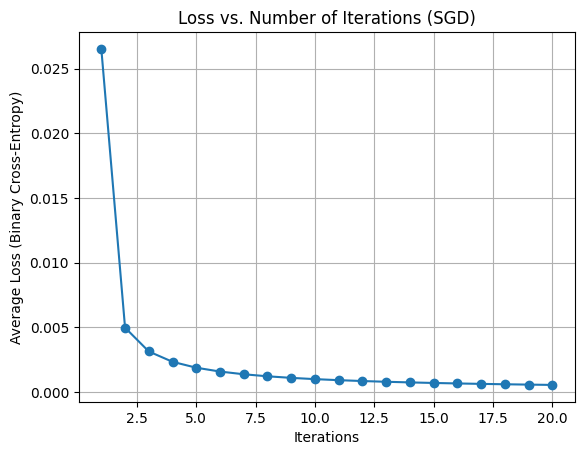

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for the bias term

# Initialize weights
np.random.seed(1)
weights = np.random.rand(X.shape[1]) * 0.01  # Small random weights initialization

# Hyperparameters
learning_rate = 0.01  # Small learning rate for stochastic updates
iterations = 20

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss storage
loss_values = []

# Stochastic Gradient Descent
for iteration in range(iterations):
    total_loss = 0  # To accumulate the loss for each iteration
    for i in range(X.shape[0]):  # Loop over each sample
        # Calculate the prediction for a single sample
        xi = X[i, :].reshape(1, -1)
        yi = y[i]
        z = np.dot(xi, weights)
        prediction = sigmoid(z)
        
        # Compute the gradient for a single sample
        error = prediction - yi
        gradient = np.dot(xi.T, error)  # Gradient for the single sample
        
        # Update weights
        weights -= learning_rate * gradient.flatten()
        
        # Calculate the binary cross-entropy loss for the single sample
        loss = - (yi * np.log(prediction + 1e-15) + (1 - yi) * np.log(1 - prediction + 1e-15))
        total_loss += loss  # Accumulate loss over all samples
    
    # Average loss over all samples in the dataset for this iteration
    average_loss = total_loss / X.shape[0]
    loss_values.append(average_loss)
    #print(f"Iteration {iteration + 1}, Loss: {average_loss:.4f}")

# Plot the loss with respect to the number of iterations
plt.plot(range(1, iterations + 1), loss_values, marker='o')
plt.title('Loss vs. Number of Iterations (SGD)')
plt.xlabel('Iterations')
plt.ylabel('Average Loss (Binary Cross-Entropy)')
plt.grid(True)
plt.show()

## Newton Method

Iteration 1, Loss: 0.1452
Iteration 2, Loss: 0.0528
Iteration 3, Loss: 0.0203
Iteration 4, Loss: 0.0080
Iteration 5, Loss: 0.0032
Iteration 6, Loss: 0.0013
Iteration 7, Loss: 0.0005
Iteration 8, Loss: 0.0002
Iteration 9, Loss: 0.0001
Iteration 10, Loss: 0.0000
Iteration 11, Loss: 0.0000
Iteration 12, Loss: 0.0000
Iteration 13, Loss: 0.0000
Iteration 14, Loss: 0.0000
Iteration 15, Loss: 0.0000
Iteration 16, Loss: 0.0000
Iteration 17, Loss: 0.0000
Iteration 18, Loss: 0.0000
Iteration 19, Loss: 0.0000
Iteration 20, Loss: 0.0000


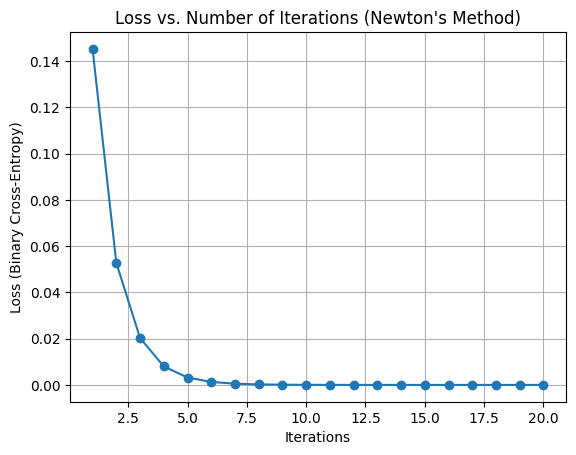

In [68]:
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term (column of ones for intercept)
X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for the bias term

# Initialize weights
np.random.seed(1)
weights = np.random.rand(X.shape[1]) * 0.01  # Small random weights initialization

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient of the log-likelihood
def compute_gradient(X, y, weights):
    predictions = sigmoid(np.dot(X, weights))
    error = predictions - y
    gradient = np.dot(X.T, error)
    return gradient

# Hessian matrix (second derivative of the log-likelihood)
def compute_hessian(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    diagonal = predictions * (1 - predictions)
    R = np.diag(diagonal)
    hessian = np.dot(np.dot(X.T, R), X)
    return hessian

# Loss storage
loss_values = []

# Newton's Method for 20 iterations
iterations = 20
for i in range(iterations):
    # Compute the gradient and Hessian
    gradient = compute_gradient(X, y, weights)
    hessian = compute_hessian(X, weights)
    
    # Update weights using Newton's method
    hessian_inv = np.linalg.inv(hessian)
    weights -= np.dot(hessian_inv, gradient)
    
    # Compute the binary cross-entropy loss
    predictions = sigmoid(np.dot(X, weights))
    loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    loss_values.append(loss)
    
    # Print loss for each iteration
    print(f'Iteration {i + 1}, Loss: {loss:.4f}')

# Plot the loss with respect to the number of iterations
import matplotlib.pyplot as plt
plt.plot(range(1, iterations + 1), loss_values, marker='o')
plt.title('Loss vs. Number of Iterations (Newton\'s Method)')
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid(True)
plt.show()

## All in one

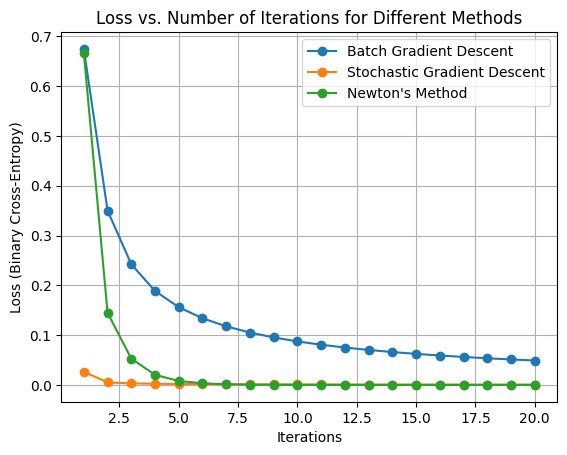

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for the bias term

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entropy Loss
def binary_cross_entropy(predictions, y):
    return -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))


### 1. Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.1, iterations=20):
    weights = np.random.rand(X.shape[1]) * 0.01
    loss_values = []
    for i in range(iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        error = predictions - y
        gradient = np.dot(X.T, error) / y.size
        weights -= learning_rate * gradient
        loss = binary_cross_entropy(predictions, y)
        loss_values.append(loss)
    return loss_values


### 2. Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    weights = np.random.rand(X.shape[1]) * 0.01
    loss_values = []
    for iteration in range(iterations):
        total_loss = 0
        for i in range(X.shape[0]):
            xi = X[i, :].reshape(1, -1)
            yi = y[i]
            z = np.dot(xi, weights)
            prediction = sigmoid(z)
            error = prediction - yi
            gradient = np.dot(xi.T, error)
            weights -= learning_rate * gradient.flatten()
            loss = - (yi * np.log(prediction + 1e-15) + (1 - yi) * np.log(1 - prediction + 1e-15))
            total_loss += loss
        average_loss = total_loss / X.shape[0]
        loss_values.append(average_loss)
    return loss_values


### 3. Newton's Method
def newtons_method(X, y, iterations=20):
    weights = np.random.rand(X.shape[1]) * 0.01
    loss_values = []
    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, predictions - y)
        diagonal = predictions * (1 - predictions)
        R = np.diag(diagonal)
        hessian = np.dot(np.dot(X.T, R), X)
        hessian_inv = np.linalg.inv(hessian)
        weights -= np.dot(hessian_inv, gradient)
        loss = binary_cross_entropy(predictions, y)
        loss_values.append(loss)
    return loss_values


# Parameters
iterations = 20

# Run each optimization method
loss_batch = batch_gradient_descent(X, y, iterations=iterations)
loss_stochastic = stochastic_gradient_descent(X, y, iterations=iterations)
loss_newton = newtons_method(X, y, iterations=iterations)

# Plotting
plt.plot(range(1, iterations + 1), loss_batch, label='Batch Gradient Descent', marker='o')
plt.plot(range(1, iterations + 1), loss_stochastic, label='Stochastic Gradient Descent', marker='o')
plt.plot(range(1, iterations + 1), loss_newton, label="Newton's Method", marker='o')
plt.title('Loss vs. Number of Iterations for Different Methods')
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.legend()
plt.grid(True)
plt.show()

## Centers changed

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
# Generate synthetic data
np.random.seed(0)
centers = [[3, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

Iteration 1, Loss: 0.6928
Iteration 2, Loss: 0.6400
Iteration 3, Loss: 0.6182
Iteration 4, Loss: 0.6062
Iteration 5, Loss: 0.5978
Iteration 6, Loss: 0.5910
Iteration 7, Loss: 0.5851
Iteration 8, Loss: 0.5796
Iteration 9, Loss: 0.5746
Iteration 10, Loss: 0.5699
Iteration 11, Loss: 0.5655
Iteration 12, Loss: 0.5614
Iteration 13, Loss: 0.5575
Iteration 14, Loss: 0.5538
Iteration 15, Loss: 0.5503
Iteration 16, Loss: 0.5470
Iteration 17, Loss: 0.5439
Iteration 18, Loss: 0.5410
Iteration 19, Loss: 0.5382
Iteration 20, Loss: 0.5355


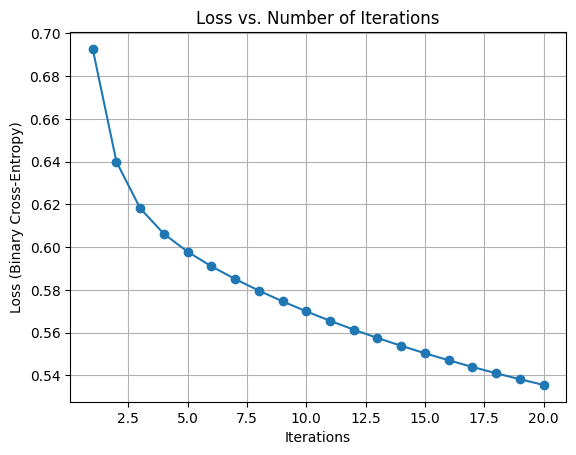

In [75]:

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for the bias term

# Initialize weights
np.random.seed(1)
weights = np.random.rand(X.shape[1]) * 0.01  # Small random weights

# Hyperparameters
learning_rate = 0.1
iterations = 20

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Store loss values
loss_values = []

# Batch Gradient Descent
for i in range(iterations):
    # Calculate predictions
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    
    # Compute the gradient
    error = predictions - y
    gradient = np.dot(X.T, error) / y.size  # Average gradient
    
    # Update weights
    weights -= learning_rate * gradient
    
    # Calculate and store the loss (Binary Cross-Entropy Loss)
    loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    loss_values.append(loss)
    print(f'Iteration {i + 1}, Loss: {loss:.4f}')

# Plot the loss with respect to the number of iterations
plt.plot(range(1, iterations + 1), loss_values, marker='o')
plt.title('Loss vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid(True)
plt.show()

Both

Iteration 1 (First Dataset), Loss: 0.6856
Iteration 2 (First Dataset), Loss: 0.3526
Iteration 3 (First Dataset), Loss: 0.2432
Iteration 4 (First Dataset), Loss: 0.1891
Iteration 5 (First Dataset), Loss: 0.1562
Iteration 6 (First Dataset), Loss: 0.1339
Iteration 7 (First Dataset), Loss: 0.1177
Iteration 8 (First Dataset), Loss: 0.1052
Iteration 9 (First Dataset), Loss: 0.0954
Iteration 10 (First Dataset), Loss: 0.0874
Iteration 11 (First Dataset), Loss: 0.0807
Iteration 12 (First Dataset), Loss: 0.0750
Iteration 13 (First Dataset), Loss: 0.0702
Iteration 14 (First Dataset), Loss: 0.0660
Iteration 15 (First Dataset), Loss: 0.0623
Iteration 16 (First Dataset), Loss: 0.0590
Iteration 17 (First Dataset), Loss: 0.0561
Iteration 18 (First Dataset), Loss: 0.0535
Iteration 19 (First Dataset), Loss: 0.0511
Iteration 20 (First Dataset), Loss: 0.0490
Iteration 1 (Second Dataset), Loss: 0.6928
Iteration 2 (Second Dataset), Loss: 0.6400
Iteration 3 (Second Dataset), Loss: 0.6182
Iteration 4 (Second 

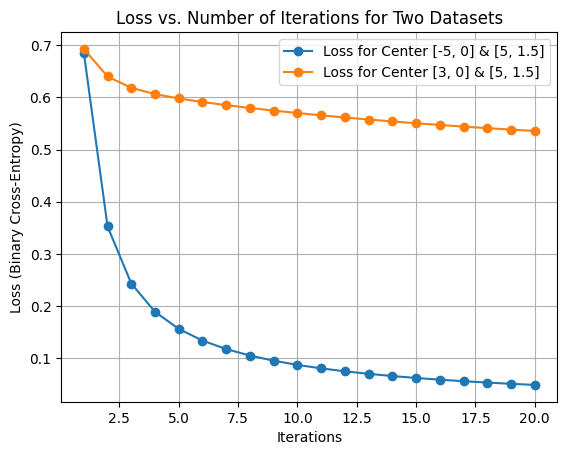

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data for the first case
np.random.seed(0)
centers1 = [[-5, 0], [5, 1.5]]
X1, y1 = make_blobs(n_samples=2000, centers=centers1, random_state=5)
transformation1 = [[0.5, 0.5], [-0.5, 1.5]]
X1 = np.dot(X1, transformation1)

# Add bias term
X1 = np.c_[np.ones(X1.shape[0]), X1]  # Adding a column of ones for the bias term

# Initialize weights
np.random.seed(1)
weights1 = np.random.rand(X1.shape[1]) * 0.01  # Small random weights

# Hyperparameters
learning_rate = 0.1
iterations = 20

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Store loss values for the first dataset
loss_values1 = []

# Batch Gradient Descent for the first dataset
for i in range(iterations):
    # Calculate predictions
    z = np.dot(X1, weights1)
    predictions = sigmoid(z)
    
    # Compute the gradient
    error = predictions - y1
    gradient = np.dot(X1.T, error) / y1.size  # Average gradient
    
    # Update weights
    weights1 -= learning_rate * gradient
    
    # Calculate and store the loss (Binary Cross-Entropy Loss)
    loss1 = -np.mean(y1 * np.log(predictions + 1e-15) + (1 - y1) * np.log(1 - predictions + 1e-15))
    loss_values1.append(loss1)
    print(f'Iteration {i + 1} (First Dataset), Loss: {loss1:.4f}')

# Generate synthetic data for the second case
np.random.seed(0)
centers2 = [[3, 0], [5, 1.5]]
X2, y2 = make_blobs(n_samples=2000, centers=centers2, random_state=5)
transformation2 = [[0.5, 0.5], [-0.5, 1.5]]
X2 = np.dot(X2, transformation2)

# Add bias term
X2 = np.c_[np.ones(X2.shape[0]), X2]  # Adding a column of ones for the bias term

# Initialize weights for the second dataset
np.random.seed(1)
weights2 = np.random.rand(X2.shape[1]) * 0.01  # Small random weights

# Store loss values for the second dataset
loss_values2 = []

# Batch Gradient Descent for the second dataset
for i in range(iterations):
    # Calculate predictions
    z = np.dot(X2, weights2)
    predictions = sigmoid(z)
    
    # Compute the gradient
    error = predictions - y2
    gradient = np.dot(X2.T, error) / y2.size  # Average gradient
    
    # Update weights
    weights2 -= learning_rate * gradient
    
    # Calculate and store the loss (Binary Cross-Entropy Loss)
    loss2 = -np.mean(y2 * np.log(predictions + 1e-15) + (1 - y2) * np.log(1 - predictions + 1e-15))
    loss_values2.append(loss2)
    print(f'Iteration {i + 1} (Second Dataset), Loss: {loss2:.4f}')

# Plot both loss values on the same graph
plt.plot(range(1, iterations + 1), loss_values1, marker='o', label='Loss for Center [-5, 0] & [5, 1.5]')
plt.plot(range(1, iterations + 1), loss_values2, marker='o', label='Loss for Center [3, 0] & [5, 1.5]')
plt.title('Loss vs. Number of Iterations for Two Datasets')
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.legend()
plt.grid(True)
plt.show()
